## Testing wavelegnth mapping with all chips




('\nwl_map params 1\t', array([ -1.74746594e-07,   1.16336125e-02,   2.11181943e+03]))
('\nwl_map params 2\t', array([ -2.04707265e-07,   1.17850868e-02,   2.11176256e+03]))
('\nwl_map params 3 \t', array([ -1.89085361e-07,   1.17844074e-02,   2.11165609e+03]))
('\nWl map params Combined\t', array([ -2.23643199e-07,   1.21032048e-02,   2.11092128e+03]))
('len(Combined_pixels)', 70)
('len(Combined_wls)', 70)
[2112.5014999999999, 2112.7363999999998, 2113.2671999999998, 2114.0160999999998, 2114.7703999999999, 2115.1197000000002, 2115.5329000000002, 2115.6116999999999, 2115.6898999999999, 2116.1774999999998, 2116.2948999999999, 2118.2273, 2118.5322000000001, 2119.1187, 2119.5794000000001, 2119.7375000000002, 2120.0459999999998, 2120.3425000000002, 2120.5023000000001, 2121.3287999999998, 2121.4627, 2121.9526999999998, 2122.4479000000001, 2122.9488999999999, 2123.4587000000001, 2127.5962, 2127.7325999999998, 2130.0416, 2130.5506999999998, 2130.6374000000001, 2130.7932000000001, 2132.79840000

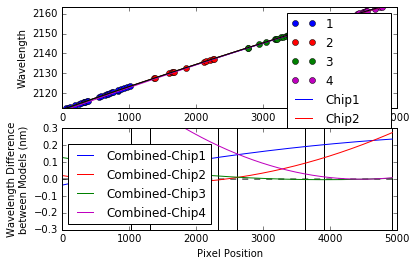

b= 2111.78371366 +- 0.00300173892933
m= 0.0117175656333 +- 3.26746572065e-06
q= -1.80570615426e-07 +- 6.71777250247e-10


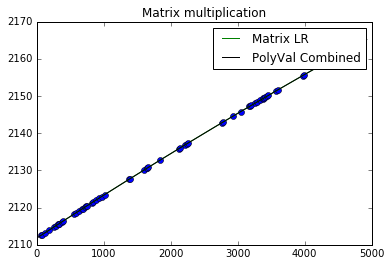

They return the equivalent results
('Hour of observation,', '0')
('Match Filenames to', 'tapas_*2012-04-07*', 'and', '*T00:*:**')
('Telluric Name', ['tapas_HD30501_1_R50000_2012-04-07T00:20:00.ipac'])


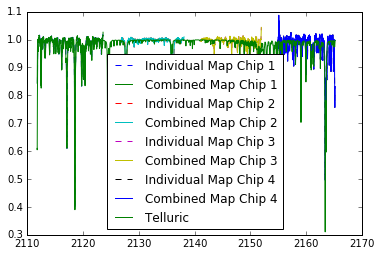

In [2]:
# Copying all code from my script file



#!/usr/lib/python3

# Testing the affectof using all 3 cips with the known offset between them to wave length calibrate the spectra
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
def gen_map(x, a, b, c, noise):
    #noise_vals = noise * np.random.randn(len(x))
    ans =  [a*xpos**2 + b*xpos + c + float(noise*np.random.randn(1)) for xpos in x]
    return ans

# Pixel gaps Brogi et al 2015
Gap1 = 282
Gap2 = 278
Gap3 = 275
Gap_sum = Gap1 + Gap2 + Gap3

Chipnames = ["Coordinates_CRIRE.2012-04-07T00:08:29.976_1.nod.ms.norm.sum.txt","Coordinates_CRIRE.2012-04-07T00:08:29.976_2.nod.ms.norm.sum.txt","Coordinates_CRIRE.2012-04-07T00:08:29.976_3.nod.ms.norm.sum.txt","Coordinates_CRIRE.2012-04-07T00:08:29.976_4.nod.ms.norm.sum.txt"]
PATH = "/home/jneal/Dropbox/PhD/"
#PATH = "/home/jneal/Dropbox/PhD/"
#"/home/jneal/Dropbox/PhD/"
pix1, wlen1, dpth1 = np.loadtxt(PATH+Chipnames[0], skiprows=1, unpack=True)
pix2, wlen2, dpth2 = np.loadtxt(PATH+Chipnames[1], skiprows=1, unpack=True)
pix3, wlen3, dpth3 = np.loadtxt(PATH+Chipnames[2], skiprows=1, unpack=True)
pix4, wlen4, dpth4 = np.loadtxt(PATH+Chipnames[3], skiprows=1, unpack=True)
while False:
	pass
	#Test_pxl1 = [70, 200, 549, 937, 1015]
	#Test_pxl2 = [100, 400, 649, 737, 815] 
	#Test_pxl3 = [50, 200, 549, 937, 915] 
	#Test_pxl4 = [207, 400, 519, 837, 1015] 

	#Test_pxl2 = [pxl + 1*1024 + Gap1 for pxl in Test_pxl2]
	#Test_pxl3 = [pxl + 2*1024 + Gap1 + Gap2 for pxl in Test_pxl3]
	#Test_pxl4 = [pxl + 3*1024 + Gap_sum for pxl in Test_pxl4]

	#aa = 5/5000000.0    # smaller value 
	#bb = 80/5000.0   # 80 nm over 4*1024 detectors plus gaps
	## noise = 0.05   # nm

	##Test_wl2 = gen_map(Test_pxl2, aa, bb, cc, noise)
	#Test_wl3 = gen_map(Test_pxl3, aa, bb, cc, noise)
	#Test_wl4 = gen_map(Test_pxl4, aa, bb, cc, noise)
 
Test_pxl1 = [pxl for pxl in pix1] 
Test_pxl2 = [pxl + 1*1024 + Gap1 for pxl in pix2]
Test_pxl3 = [pxl + 2*1024 + Gap1 + Gap2 for pxl in pix3]
Test_pxl4 = [pxl + 3*1024 + Gap_sum for pxl in pix4]
Test_wl1 = [wl for wl in wlen1]
Test_wl2 = [wl for wl in wlen2]
Test_wl3 = [wl for wl in wlen3]
Test_wl4 = [wl for wl in wlen4]

plt.subplot(211)
plt.plot(Test_pxl1, Test_wl1, "bo", label="1")
plt.plot(Test_pxl2, Test_wl2, "ro", label="2")
plt.plot(Test_pxl3, Test_wl3, "go", label="3")
plt.plot(Test_pxl4, Test_wl4, "mo", label="4")
plt.ylim([min(Test_wl1), max(Test_wl4)])
ax1 = plt.gca()
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xlabel("Pixel Position")
plt.ylabel("Wavelength")
#plt.legend()
#plt.show()

max_pixel = 4*1024 + Gap_sum
pixel_span = range(1, max_pixel)

# Fit to the individual chips
order = 2
wl_map1 = np.polyfit(Test_pxl1, Test_wl1, order)
print("\nwl_map params 1\t", wl_map1)
wlvals1 = np.polyval(wl_map1, pixel_span) 

wl_map2 = np.polyfit(Test_pxl2, Test_wl2, order)
print("\nwl_map params 2\t", wl_map2)
wlvals2 = np.polyval(wl_map2, pixel_span) 

wl_map3 = np.polyfit(Test_pxl3, Test_wl3, order)
print("\nwl_map params 3 \t", wl_map3)
wlvals3 = np.polyval(wl_map3, pixel_span) 

wl_map4 = np.polyfit(Test_pxl4, Test_wl4, order)
print("\nWl map params Combined\t", wl_map4)
wlvals4 = np.polyval(wl_map4, pixel_span) 

# Fit to combined data
Combined_pixels = Test_pxl1 + Test_pxl2 + Test_pxl3 + Test_pxl4
Combined_wls = Test_wl1 + Test_wl2 + Test_wl3 + Test_wl4

print("len(Combined_pixels)",len(Combined_pixels))

print("len(Combined_wls)",len(Combined_wls))
print(Combined_wls)

Combined_map = np.polyfit(Combined_pixels, Combined_wls, order)
print("\nwl_map params 4\t", Combined_map)
Combined_vals = np.polyval(Combined_map, pixel_span) 


plt.plot(pixel_span, wlvals1, 'b', label="Chip1")
plt.plot(pixel_span, wlvals2, 'r', label="Chip2")
plt.plot(pixel_span, wlvals3, 'g', label="Chip3")
plt.plot(pixel_span, wlvals4, 'm', label="Chip4")
plt.plot(pixel_span, Combined_vals, 'k', label="Combined")

plt.legend(loc=0)

plt.subplot(212)
plt.plot(pixel_span, np.zeros_like(pixel_span), "k--", label = "")
plt.plot(pixel_span, Combined_vals-wlvals1, 'b', label = "Combined-Chip1")
plt.plot(pixel_span, Combined_vals-wlvals2, 'r', label = "Combined-Chip2")
plt.plot(pixel_span, Combined_vals-wlvals3, 'g', label = "Combined-Chip3")
plt.plot(pixel_span, Combined_vals-wlvals4, 'm', label = "Combined-Chip4")
plt.xlabel("Pixel Position")
plt.ylabel("Wavelength Difference\nbetween Models (nm)")
plt.legend(loc=0)
ax1 = plt.gca()
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
plt.ylim([-0.3,0.3])

# Mark Chip positions
linepos = [0, 1024, 1024+Gap1, 2*1024+Gap1, 2*1024+Gap1+Gap2, 3*1024+Gap1+Gap2, 3*1024+Gap1+Gap2+Gap3, 4*1024+Gap1+Gap2+Gap3]
plt.vlines(linepos, -1, 1)

plt.show()



noise=0.01
#  Try fitting with matrix multiplication

x = np.array(Combined_pixels)
y = np.array(Combined_wls)
yerr = np.array(noise*np.ones_like(x))
#print("x", x)
#print("y", y)

## least-squares solution
# build the matrix A (you can use the np.vstack function)
A = np.vstack((np.ones_like(x), x, x**2)).T

# build the matrix C
C = np.diag(yerr**2)

# calculate the covariance matrix [A^T C^-1 A]^-1
# (use the linear algebra functions in np.linalg)
cov = np.dot(A.T, np.linalg.solve(C, A))
cov2 = np.linalg.inv(cov)

# calculate the X matrix
X = np.dot(cov2, np.dot(A.T, np.linalg.solve(C, y)))

# extract from X the parameters m and b
b, m, q = X 

print('b= {} +- {}'.format(b, np.sqrt(cov2[0,0])))
print('m= {} +- {}'.format(m, np.sqrt(cov2[1,1])))
print('q= {} +- {}'.format(q, np.sqrt(cov2[2,2])))

# plot the data (with errorbars) and the best-fit line
plt.figure()
plt.errorbar(x, y, yerr=noise, fmt='o')

xx = np.linspace(min(x), max(x))
plt.plot(xx, q*xx**2 + m*xx + b, '-', label="Matrix LR")
plt.title("Matrix multiplication")
plt.plot(pixel_span, Combined_vals, 'k', label="PolyVal Combined")
plt.legend()
plt.show()


print("They return the equivalent results")

while False:#Third order regression
	print("adding x**3 term ")
	A = np.vstack((np.ones_like(x), x, x**2, x**3)).T

	# build the matrix C
	C = np.diag(yerr**2)

	# calculate the covariance matrix [A^T C^-1 A]^-1
	# (use the linear algebra functions in np.linalg)
	cov = np.dot(A.T, np.linalg.solve(C, A))
	cov2 = np.linalg.inv(cov)

	# calculate the X matrix
	X = np.dot(cov2, np.dot(A.T, np.linalg.solve(C, y)))

	# extract from X the parameters m and b
	b3, m3, q3 , r3 = X 

	print('b= {} +- {}'.format(b3, np.sqrt(cov2[0,0])))
	print('m= {} +- {}'.format(m3, np.sqrt(cov2[1,1])))
	print('q= {} +- {}'.format(q3, np.sqrt(cov2[2,2])))
	print('r= {} +- {}'.format(r3, np.sqrt(cov2[3,3])))

	# plot the data (with errorbars) and the best-fit line
	plt.figure()
	plt.subplot(211)
	plt.errorbar(x, y, yerr=noise, fmt='o')

	#xx = np.linspace(min(x), max(x))
	xx = np.array(pixel_span)
	yy = r3*xx**3 + q3*xx**2 + m3*xx + b3
	plt.plot(xx, yy, '-', label="Matrix LR")
	plt.title("Matrix multiplication 3rd order ")
	plt.plot(pixel_span, Combined_vals, 'k', label="PolyVal Combined")
	plt.legend()

	plt.subplot(212)
	plt.plot(pixel_span, yy-Combined_vals)
	plt.title("Difference between x**3 term and x**2 fits")
	plt.show()

	print("Orginal Equation = {0}*x**2 + {1}*x + {2}".format(aa, bb, cc))

	print("Polyval Equation = {0}*x**2 + {1}*x + {2}".format(Combined_map[0], Combined_map[1], Combined_map[2]))

	print("Regression Equation = {0}*x**2 + {1}*x + {2}".format(q, m, b))

	print("x**3 Regression Equation = {0}*x**3 + {1}*x**2 + {2}*x + {3}".format(r3, q3, m3, b3))


# Test how Wavelenght Calibration Compares
## Load in Chip data and plot telluric lines each chip with the two corrections


import Obtain_Telluric as obt
from astropy.io import fits
import GaussianFitting as gf
from TellRemoval import airmass_scaling
Path = "/home/jneal/Phd/data/Crires/BDs-DRACS/HD30501-1/Fullreductionr-test-1dec2015/Combined_Nods/"

Chipnames = ["CRIRE.2012-04-07T00:08:29.976_1.nod.ms.norm.sum.fits", "CRIRE.2012-04-07T00:08:29.976_2.nod.ms.norm.sum.fits", "CRIRE.2012-04-07T00:08:29.976_3.nod.ms.norm.sum.fits", "CRIRE.2012-04-07T00:08:29.976_4.nod.ms.norm.sum.fits"]
Gap1 = 282
Gap2 = 278
Gap3 = 275
Pixel_offsets = [0, Gap1+1024, Gap1+Gap2+2*1024, Gap1+Gap2+Gap3+3*1024]  # Pixel values offset for each chip

# Ployval wavelgnth maps
#wlvals = np.polyval(wl_map2, pixel_span) 
wlmaps = [wl_map1, wl_map2, wl_map3, wl_map4]

for num, cname in enumerate(Chipnames):

    data = fits.getdata(Path+cname)
    Chip_data = data
    chip_pixel = np.array(range(1+ Pixel_offsets[num], len(Chip_data) + 1+ Pixel_offsets[num])) 
    
    
    Chip_wl_individual = np.polyval(wlmaps[num], chip_pixel)
    
    plt.plot(Chip_wl_individual, Chip_data, "--", label="Individual Map Chip {}".format(num+1))

    Chip_wl_comb = np.polyval(Combined_map, chip_pixel)
    #Chip_wl = q*chip_pixel**2 + m*chip_pixel + b
    plt.plot(Chip_wl_comb, Chip_data, label="Combined Map Chip {}".format(num+1))
    


hdr = fits.getheader(Path+Chipnames[0])
wl_lower = hdr["HIERARCH ESO INS WLEN STRT"]
datetime = hdr["DATE-OBS"]

wl_upper = fits.getheader(Path+Chipnames[3])["HIERARCH ESO INS WLEN END"]

obsdate, obstime = datetime.split("T")
obstime, __ = obstime.split(".")

tellpath = "/home/jneal/Phd/data/Tapas/"
tellname = obt.get_telluric_name(tellpath, obsdate, obstime) # to within the hour
print("Telluric Name", tellname)

tell_data, tell_header = obt.load_telluric(tellpath, tellname[0])
    
# Scale telluric lines to airmass
start_airmass = hdr["HIERARCH ESO TEL AIRM START"]
end_airmass = hdr["HIERARCH ESO TEL AIRM END"]
obs_airmass = (start_airmass + end_airmass) / 2
    
#print(tell_header)
tell_airmass = float(tell_header["airmass"])
#print(obs_airmass, type(obs_airmass))
#print(tell_airmass, type(tell_airmass))
tell_data[1] = airmass_scaling(tell_data[1], tell_airmass, obs_airmass)
    
# Sliced to wavelength measurement of detector
calib_data = gf.slice_spectra(tell_data[0], tell_data[1], wl_lower, wl_upper)

plt.plot(calib_data[0], calib_data[1], label="Telluric")

ax1 = plt.gca()
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
plt.legend(loc=0)
plt.show()
